## Real Estate - Price Prediction


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")    ## data frame

In [3]:
housing.head()   ##top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        501 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()  ## summary of categorial features 

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()      #CRIM Ignore null blanks
                        # mean : averange of all value 
                        # std : how far is your value from mean 
                        # % indicates the obseravations whose values are than 50%, 75%, 25% 
                        # 25% = 25% values are less than 0.082045
                        # 50% = 50% values are less than 0.256510
                        # 75% = 75% values are less than 3.677082

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287367,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704840,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#For plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins = 50, figsize= (20,50))
#plt.show()

## Test Train Splitting

#### numpy.random.permutation() randomly permute a sequence, or return a permuted range.
#### pandas.DataFrame.iloc() is purely integer-location based indexing for selection by position.


In [9]:
##For learning purpose
import numpy as np
np.random.seed(42)    ##bec we dont want our model to see the whole data set(can lead to overfitting)
                        ## so we will fix te values to be taken for test using seed
def split_train_test(data, test_ratio):
    
    shuffled = np.random.permutation(len(data))   ##shuffle data with random indices
    test_set_size = int(len(data)* test_ratio)   
    test_indices = shuffled[: test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

## Train Test Split Using sklearn

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set: 404 
Rows in test set: 102


#### Stratified sampling: Lets see an example we have CHAS = 0 or 1; what if only the 0's are only taken by the test data, which means model didn't see (1's) all the values. So to resolve this we use StratifiedShuffleSplit

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      102 non-null    float64
 1   ZN        102 non-null    float64
 2   INDUS     102 non-null    float64
 3   CHAS      102 non-null    int64  
 4   NOX       102 non-null    float64
 5   RM        99 non-null     float64
 6   AGE       102 non-null    float64
 7   DIS       102 non-null    float64
 8   RAD       102 non-null    int64  
 9   TAX       102 non-null    int64  
 10   PTRATIO  102 non-null    float64
 11  B         102 non-null    float64
 12  LSTAT     102 non-null    float64
 13  MEDV      102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
#376/28

In [18]:
#95/7

In [19]:
housing = strat_train_set.copy()

## Looking for Correlations

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

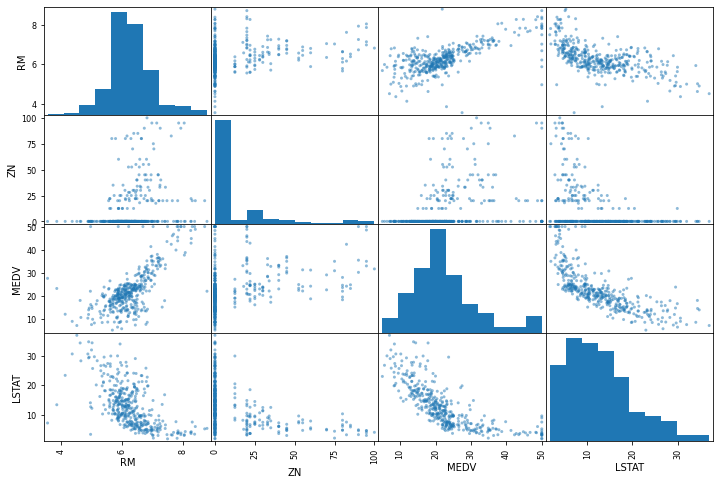

In [20]:
from pandas.plotting import scatter_matrix 
attributes = ["RM", "ZN", "MEDV","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

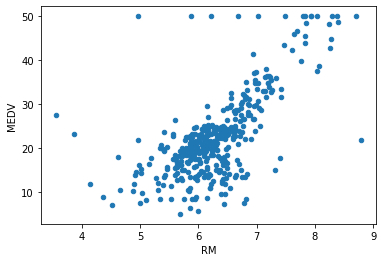

In [21]:
housing.plot(kind = "scatter", x ="RM",  y = "MEDV", alpha =1)

## Trying Attribute Combination

In [22]:
housing["TAXRM"]= housing["TAX"]/ housing["RM"]

In [23]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)  #Pearson corr. (what is the effect of one value on the other)
##in the output  MEDV got 1.000000 value which means MEDV has string positive correlation
## RM is also positive corr with MEDV; If we increase the value of RM  with MEDV the house price will incerease

MEDV        1.000000
RM          0.679630
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
 PTRATIO   -0.493534
TAXRM      -0.524926
LSTAT      -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

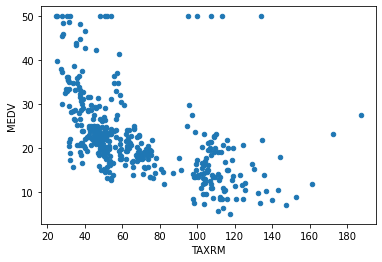

In [25]:
housing.plot(kind = "scatter", x ="TAXRM",  y = "MEDV", alpha =1)

In [26]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
#To take care of missing attribiutes, you have three options:
 #   1. Get rid of th emissing data points
  #  2.Get rid of the whole attribute
   # 3. Set the value to some value(0, mean or median)

In [28]:
# option1: Drop NA
a = housing.dropna(subset=["RM"])
a.shape
#the orignial dataframe will remain unchanged 

(402, 13)

In [29]:
housing.drop("RM", axis =1)  #option 2
# no RM column and also note taht the original housing dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [30]:
#option 3 
median = housing["RM"].median()
housing["RM"].fillna(median) # fill missing data
#original housing df remains same 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe()  #before we stared filling missing attribites using imputer  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,402.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279811,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714453,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630750,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")  
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X = imputer.transform(housing)   #transform(housing) = impute all missing values in housing 

In [36]:
##X. info can not be run bec its a numpypy array 

In [37]:
housing_tr = pd.DataFrame(X, columns = housing.columns)  #tr = transformed  df which has no missing values  

In [38]:
housing_tr.describe()   #now we get RM count 506 bec now we have imputed the missing values 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279465,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712695,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit- learn Design

Primarily, three types of object:
    1. Estimators: Estimates some parameter based on a dataset eg imputer
        It has a fit and  transform method
        Fit method = fits the dataset and calculates internal parameters.
    
    2. Tranformers: Takes i/p and returns o/p based on the learnings from fit(). 
       It also has a convenience function called fit_transforms() which fits and then transform.

    3.Predictiors: LinearRegression model is an example of predictor.
         fit() and predict() are two common functions. It also gives some function which will evalutes the predictions.
    

## Feature Scaling

Two types of feature scaling methods are:
    1. Min-max scaling(normalization)
    (value - min) / (max-min)   #benifit= same scale (0 to 1)
    Sklearn provides MinMaxScaler for this.
    
    2. Standardization
    (value - mean)/ std 
    sklearn provides a class called StandardScaler for this.
    

##  Creating Pipeline

In [39]:
from sklearn.pipeline import Pipeline
#feature scaling(same scale(range))

from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #... add as many as you want in your pipline
    
    ('std_scaler', StandardScaler()),
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape  #numpy arrray bec precitors takes numpy array in input

(404, 13)

## Selecting a desired model for Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()   
#model = DecisionTreeRegressor() #as error is 0 => overfitting(noise has been taken by the model)
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([22.555, 24.916, 16.634, 23.466, 23.55 ])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [48]:
##Evaluating th model
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse =  np.sqrt(mse)

In [49]:
rmse

1.298494703512303

## Using Better Evaluation technique - Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
# Score = negative_mean_square_error bec we need utility for CV(high is better) 
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)     ##bec square root of negative is not possible so we write -scores


##using CV DT is working better than Linearregression

In [51]:
rmse_scores

array([2.76371336, 2.87456788, 4.4670857 , 2.6855361 , 3.36690765,
       2.66672402, 4.84295085, 3.31673312, 2.88750368, 3.3156771 ])

In [52]:
def print_scores(scores):
    print("Scores are:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:" ,scores.std())

In [53]:
print_scores(rmse_scores)

Scores are: [2.76371336 2.87456788 4.4670857  2.6855361  3.36690765 2.66672402
 4.84295085 3.31673312 2.88750368 3.3156771 ]
Mean: 3.3187399465086735
Standard Deviation: 0.7184448711449152


## Saving the model

In [54]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [55]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.277 11.589 25.526 22.002 18.649 15.117 20.518 14.177 32.135 42.192
 19.314 11.988 24.527 26.266 19.507 11.38  32.141 14.291 23.723 18.575
 19.717 17.901 19.194 22.029 18.269 31.036 16.011 32.572  8.696 33.899
 24.066 21.274 23.154 11.33  20.925 10.863 43.832 24.279 23.683 42.019
 23.791 30.63  20.466 20.805 19.161 33.695 44.686 19.944 20.016 21.932
 21.275 14.611 21.538 14.96  24.72  33.395 42.71  29.017 20.265 20.8
 46.66   9.747 18.899 25.505 14.134 32.953 20.164 17.385 18.793 34.388
 25.621 23.174 21.042 22.591 34.615 13.007 15.668 19.686 20.708 21.33
 22.702 21.096 13.929 22.785 20.553 21.405 13.641 21.257 21.773 23.356
 18.831 27.054  7.467 25.808 18.87  29.617 20.238 32.091 14.463 26.659
 21.332 20.773] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

In [56]:
final_rmse

3.003603391483856

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24088565, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [58]:
from joblib import dump, load
import numpy as np
model = load('dragon.joblib') 

features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24088565, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.555])